In [1]:
from time import time
import sys
from math import factorial
import matplotlib.style
matplotlib.style.use('ggplot')
from matplotlib import pyplot as plt
%matplotlib inline

## Key Concepts

* Call Stack
* Base Case vs. Recursive Case

## Canonical Example: Fibonacci Sequence

[Wikipedia: Fibonacci Number](https://en.wikipedia.org/wiki/Fibonacci_number)

> In mathematics, the Fibonacci numbers, commonly denoted Fn form a sequence, called the Fibonacci sequence, such that each number is the sum of the two preceding ones, starting from 0 and 1.

Example of a Fibonacci Sequence:

> `[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ...]`

### Naive Recursive Solution

In [2]:
def fib(n):
    """Returns element n from the Fibonacci Sequence."""
    if n <= 1:
        return n
    return fib(n-2) + fib(n-1)

Looking at the function above:
 * What portion of the function represents the _base case_?
 * What portion represents the _recursive case_? 

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887]


Text(0, 0.5, 'fib(n)')

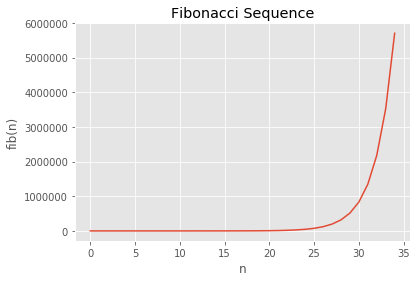

In [3]:
fib_sequence = [fib(n) for n in range(35)]
print(fib_sequence)
fig, ax = plt.subplots()
ax.plot(fib_sequence)
ax.set_title('Fibonacci Sequence')
ax.set_xlabel('n')
ax.set_ylabel('fib(n)')

### Add Timing

In [4]:
def time_fn(f, arg):
    """Returns the number of seconds a call to f takes to run."""
    start_time = time()
    f(arg)
    end_time = time()
    return end_time - start_time

In [5]:
fib_times = [time_fn(fib, n) for n in range(35)]

In [6]:
def plot_fib_runtime(fib_sequence, fib_times):
    """Plot the runtime next to the sequence."""
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(fib_sequence)
    axs[0].set_title("Fibonacci Sequence")
    axs[0].set_ylabel("fib(n)")
    axs[1].plot(fib_times)
    axs[1].set_title("Fibonacci Runtime")
    axs[1].set_ylabel('Seconds to run fib(n)')
    for ax in axs:
        ax.set_xlabel('n')
    plt.tight_layout()

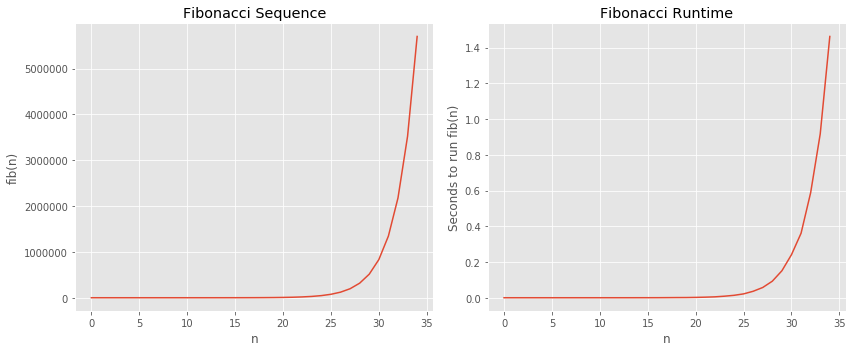

In [7]:
plot_fib_runtime(fib_sequence, fib_times)

### Add Stack Monitoring (Naive Version)

In [70]:
def trace_call_stack(f, args, depth=0):
    """Provide an indented stack trace of calls to f."""
    sys.stdout.write(f"{depth:2}: " + (" " * depth * 4))
    print(f"fib({args[0]}) called")
    output = f(*args)
    sys.stdout.write(f"{depth:2}: " + " " * depth * 4)
    print(f"fib({args[0]}) returned {output}")
    return output

In [71]:
def fib(n, depth=0):
    """Return element n from the Fibonacci Sequence"""
    if n <= 1:
        return n
    return (trace_call_stack(fib, (n-1, depth+1), depth+1) +
            trace_call_stack(fib, (n-2, depth+1), depth+1))

In [76]:
trace_call_stack(f=fib, args=(7,))

 0: fib(7) called
 1:     fib(6) called
 2:         fib(5) called
 3:             fib(4) called
 4:                 fib(3) called
 5:                     fib(2) called
 6:                         fib(1) called
 6:                         fib(1) returned 1
 6:                         fib(0) called
 6:                         fib(0) returned 0
 5:                     fib(2) returned 1
 5:                     fib(1) called
 5:                     fib(1) returned 1
 4:                 fib(3) returned 2
 4:                 fib(2) called
 5:                     fib(1) called
 5:                     fib(1) returned 1
 5:                     fib(0) called
 5:                     fib(0) returned 0
 4:                 fib(2) returned 1
 3:             fib(4) returned 3
 3:             fib(3) called
 4:                 fib(2) called
 5:                     fib(1) called
 5:                     fib(1) returned 1
 5:                     fib(0) called
 5:                     fib(0) returned 0
 4:   

13

### Add Memoization

In [8]:
def fib(n, seq=None):
    """Return element n from the Fibonacci Sequence"""
    if seq is None:
        seq = {0: 0, 1: 1}
    if n in seq:
        return seq[n]
    seq[n] = fib(n-2, seq) + fib(n-1, seq)
    return seq[n]

In [9]:
fib_times = [time_fn(fib, n) for n in range(35)]

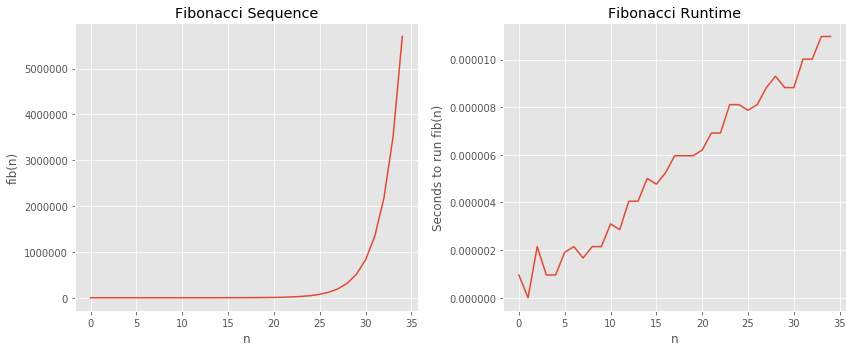

In [10]:
plot_fib_runtime(fib_sequence, fib_times)

### Add Stack Monitoring (Memoized Version)

In [63]:
def trace_call_stack(f, args, depth=0):
    """Provide an indented stack trace of calls to f."""
    sys.stdout.write(f"{depth:2}: " + (" " * depth * 4))
    print(f"fib({args[0]}) called")
    output = f(*args)
    sys.stdout.write(f"{depth:2}: " + " " * depth * 4)
    print(f"fib({args[0]}) returned {output}")
    return output

In [67]:
def fib(n, seq=None, depth=0):
    """Return element n from the Fibonacci Sequence"""
    if seq is None:
        seq = {0: 0, 1: 1}
    if n in seq:
        return seq[n]
    seq[n] = (trace_call_stack(fib, (n-1, seq, depth+1), depth+1) +
              trace_call_stack(fib, (n-2, seq, depth+1), depth+1))
    return seq[n]

In [68]:
trace_call_stack(f=fib, args=(7, None))

 0: fib(7) called
 1:     fib(6) called
 2:         fib(5) called
 3:             fib(4) called
 4:                 fib(3) called
 5:                     fib(2) called
 6:                         fib(1) called
 6:                         fib(1) returned 1
 6:                         fib(0) called
 6:                         fib(0) returned 0
 5:                     fib(2) returned 1
 5:                     fib(1) called
 5:                     fib(1) returned 1
 4:                 fib(3) returned 2
 4:                 fib(2) called
 4:                 fib(2) returned 1
 3:             fib(4) returned 3
 3:             fib(3) called
 3:             fib(3) returned 2
 2:         fib(5) returned 5
 2:         fib(4) called
 2:         fib(4) returned 3
 1:     fib(6) returned 8
 1:     fib(5) called
 1:     fib(5) returned 5
 0: fib(7) returned 13


13